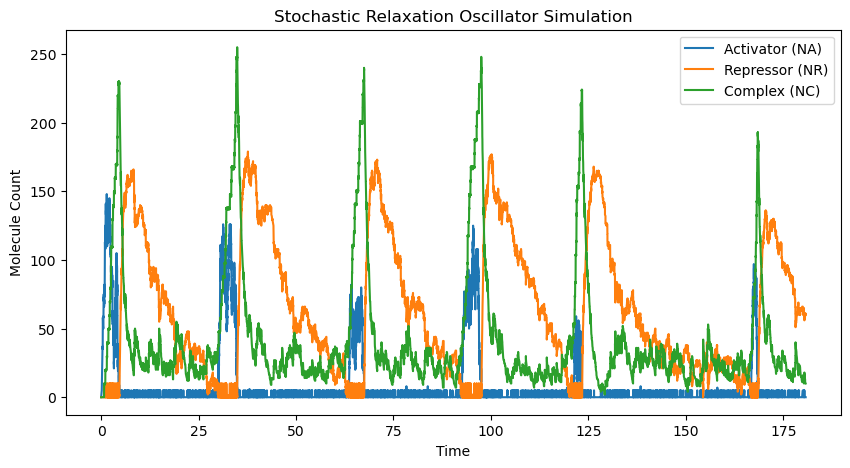

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import random

def gillespie_oscillator(gA, bA, KA, a0, dA, gR, bR, KR, kC, dR, Tend=20000):
    """ Simulate the stochastic relaxation oscillator model using Gillespie SSA."""
    X = np.zeros((Tend, 4))  # Columns: Time, NA (Activator), NR (Repressor), NC (Complex)
    
    for j in range(Tend - 1):
        NA, NR, NC = X[j, 1], X[j, 2], X[j, 3]
        
        # Calculate propensities
        a1 = (gA / bA) * (a0 + NA / KA) / (1 + NA / KA)  # Activator synthesis
        a2 = (gR / bR) * (NA / KR) / (1 + NA / KR)  # Repressor synthesis
        a3 = dA * NA  # Activator decay
        a4 = dR * NR  # Repressor decay
        a5 = kC * NA * NR  # Association (Complex formation)
        a6 = dA * NC  # Dissociation and decay
        
        asum = a1 + a2 + a3 + a4 + a5 + a6
        
        
        # Update time
        X[j+1, 0] = X[j, 0] + np.log(1/random.uniform(0, 1)) / asum
        
        # Determine reaction
        mu = random.uniform(0, 1) * asum
        if 0 <= mu < a1:
            X[j+1, 1] = NA + bA  # Activator produced
            X[j+1, 2] = NR
            X[j+1, 3] = NC
        elif a1 <= mu < a1 + a2:
            X[j+1, 1] = NA
            X[j+1, 2] = NR + bR  # Repressor produced
            X[j+1, 3] = NC
        elif a1 + a2 <= mu < a1 + a2 + a3:
            X[j+1, 1] = max(NA - 1, 0)  # Activator degraded
            X[j+1, 2] = NR
            X[j+1, 3] = NC
        elif a1 + a2 + a3 <= mu < a1 + a2 + a3 + a4:
            X[j+1, 1] = NA
            X[j+1, 2] = max(NR - 1, 0)  # Repressor degraded
            X[j+1, 3] = NC
        elif a1 + a2 + a3 + a4 <= mu < a1 + a2 + a3 + a4 + a5:
            X[j+1, 1] = max(NA - 1, 0)
            X[j+1, 2] = max(NR - 1, 0)
            X[j+1, 3] = NC + 1  # Complex formed
        else:
            X[j+1, 1] = NA
            X[j+1, 2] = NR + 1  # Free repressor restored
            X[j+1, 3] = max(NC - 1, 0)  # Complex dissociated

        
        # print(NA, NR, NC)

        # Carry forward unchanged values
        X[j+1, 1] = max(X[j+1, 1], 0)
        X[j+1, 2] = max(X[j+1, 2], 0)
        X[j+1, 3] = max(X[j+1, 3], 0)
    
    return X

# Set parameter values
gA, bA, KA, a0, dA = 250, 5, 0.5, 0.1, 1
gR, bR, KR, kC, dR = 50, 10, 1, 200, 0.1

# Run the simulation
oscillation_data = gillespie_oscillator(gA, bA, KA, a0, dA, gR, bR, KR, kC, dR)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(oscillation_data[:, 0], oscillation_data[:, 1], label='Activator (NA)')
plt.plot(oscillation_data[:, 0], oscillation_data[:, 2], label='Repressor (NR)')
plt.plot(oscillation_data[:, 0], oscillation_data[:, 3], label='Complex (NC)')
plt.xlabel('Time')
plt.ylabel('Molecule Count')
plt.legend()
plt.title('Stochastic Relaxation Oscillator Simulation')

plt.show()

# print(oscillation_data[:, 3])


b. 

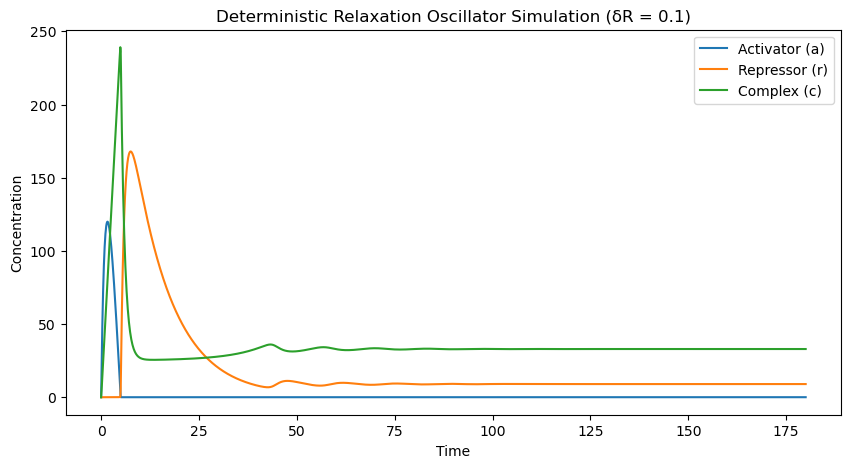

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import solve_ivp

def deterministic_oscillator(t, y, gA, bA, KA, a0, dA, gR, bR, KR, kC, dR):
    """ Defines the ODE system for the deterministic relaxation oscillator."""
    a, r, c = y
    
    da_dt = gA * (a0 + a / KA) / (1 + a / KA) - kC * a * r - dA * a
    dr_dt = gR * (a / KR) / (1 + a / KR) - kC * a * r + dA * c - dR * r
    dc_dt = kC * a * r - dA * c
    
    return [da_dt, dr_dt, dc_dt]

# Set parameter values
gA, bA, KA, a0, dA = 250, 5, 0.5, 0.1, 1
gR, bR, KR, kC, dR = 50, 10, 1, 200, 0.1

# Initial conditions
y0 = [0, 0, 0]  # Initial values for activator, repressor, and complex

# Time span
tspan = (0, 180)
t_eval = np.linspace(0, 180, 1800)

# Solve the ODEs
sol = solve_ivp(deterministic_oscillator, tspan, y0, args=(gA, bA, KA, a0, dA, gR, bR, KR, kC, dR), t_eval=t_eval)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label='Activator (a)')
plt.plot(sol.t, sol.y[1], label='Repressor (r)')
plt.plot(sol.t, sol.y[2], label='Complex (c)')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Deterministic Relaxation Oscillator Simulation (δR = 0.1)')
plt.show()



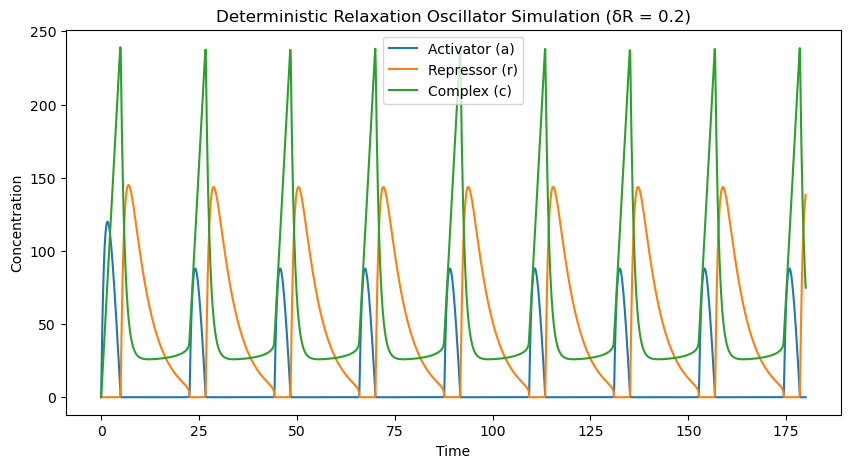

In [4]:
# Run simulation with δR = 0.2
dR = 0.2
sol2 = solve_ivp(deterministic_oscillator, tspan, y0, args=(gA, bA, KA, a0, dA, gR, bR, KR, kC, dR), t_eval=t_eval)

# Plot results for δR = 0.2
plt.figure(figsize=(10, 5))
plt.plot(sol2.t, sol2.y[0], label='Activator (a)')
plt.plot(sol2.t, sol2.y[1], label='Repressor (r)')
plt.plot(sol2.t, sol2.y[2], label='Complex (c)')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Deterministic Relaxation Oscillator Simulation (δR = 0.2)')
plt.show()


c.

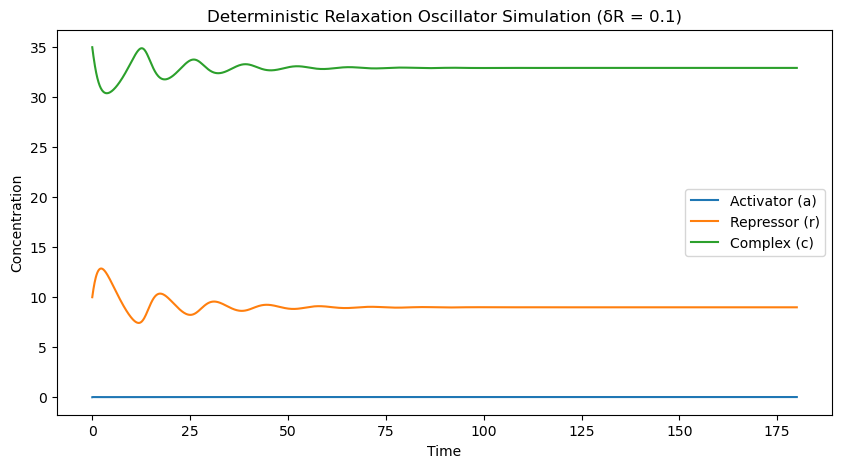

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import solve_ivp

def deterministic_oscillator(t, y, gA, bA, KA, a0, dA, gR, bR, KR, kC, dR):
    """ Defines the ODE system for the deterministic relaxation oscillator."""
    a, r, c = y
    
    da_dt = gA * (a0 + a / KA) / (1 + a / KA) - kC * a * r - dA * a
    dr_dt = gR * (a / KR) / (1 + a / KR) - kC * a * r + dA * c - dR * r
    dc_dt = kC * a * r - dA * c
    
    return [da_dt, dr_dt, dc_dt]

# Set parameter values
gA, bA, KA, a0, dA = 250, 5, 0.5, 0.1, 1
gR, bR, KR, kC, dR = 50, 10, 1, 200, 0.1

# Initial conditions
y0 = [0, 10, 35]  # Initial values for activator, repressor, and complex

# Time span
tspan = (0, 180)
t_eval = np.linspace(0, 180, 1800)

# Solve the ODEs
sol = solve_ivp(deterministic_oscillator, tspan, y0, args=(gA, bA, KA, a0, dA, gR, bR, KR, kC, dR), t_eval=t_eval)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label='Activator (a)')
plt.plot(sol.t, sol.y[1], label='Repressor (r)')
plt.plot(sol.t, sol.y[2], label='Complex (c)')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Deterministic Relaxation Oscillator Simulation (δR = 0.1)')
plt.show()



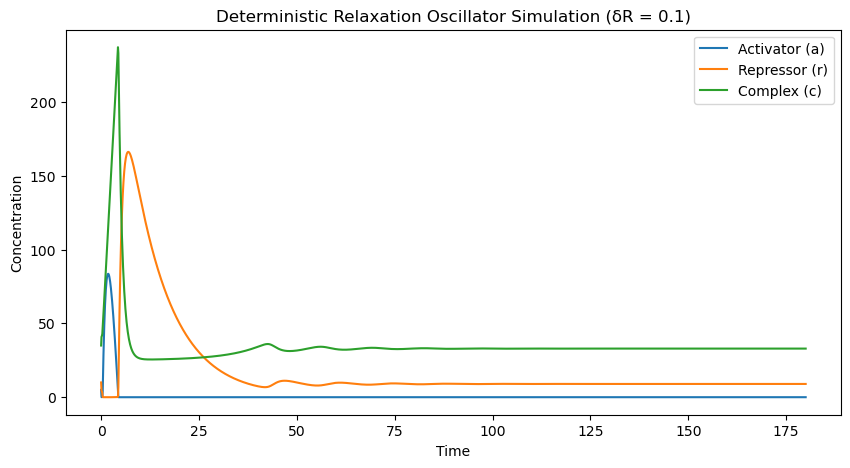

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import solve_ivp

def deterministic_oscillator(t, y, gA, bA, KA, a0, dA, gR, bR, KR, kC, dR):
    """ Defines the ODE system for the deterministic relaxation oscillator."""
    a, r, c = y
    
    da_dt = gA * (a0 + a / KA) / (1 + a / KA) - kC * a * r - dA * a
    dr_dt = gR * (a / KR) / (1 + a / KR) - kC * a * r + dA * c - dR * r
    dc_dt = kC * a * r - dA * c
    
    return [da_dt, dr_dt, dc_dt]

# Set parameter values
gA, bA, KA, a0, dA = 250, 5, 0.5, 0.1, 1
gR, bR, KR, kC, dR = 50, 10, 1, 200, 0.1

# Initial conditions
y0 = [5, 10, 35]  # Initial values for activator, repressor, and complex

# Time span
tspan = (0, 180)
t_eval = np.linspace(0, 180, 1800)

# Solve the ODEs
sol = solve_ivp(deterministic_oscillator, tspan, y0, args=(gA, bA, KA, a0, dA, gR, bR, KR, kC, dR), t_eval=t_eval)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label='Activator (a)')
plt.plot(sol.t, sol.y[1], label='Repressor (r)')
plt.plot(sol.t, sol.y[2], label='Complex (c)')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Deterministic Relaxation Oscillator Simulation (δR = 0.1)')
plt.show()

